## Introduction to Natural Language Processing


In [2]:
from IPython.display import Image


<b>Natural Language Processing</b>, or NLP, is a field of Artificial Intelligence that gives the machines the ability to read, understand, and derive meaning from human languages. NLP is a discipline where computer science, artificial intelligence, and cognitive logic are intercepted, with the objective to read, decipher, understand, and make sense of the human language in a valuable way.

<u>NLP techniques are used to solve a variety of tasks such as</u>:

* <b>Text Classification</b>: Categorizing text into predefined categories.
* <b>Sentiment Analysis</b>: Determining the sentiment or opinion of a piece of text, like a review or a tweet.
* <b>Information Extraction</b>: Extracting structured information from unstructured documents.
* <b>Machine Translation</b>: Automatically translating text from one language to another.
* <b>Topic Modeling</b>: Automatically discovering the abstract "topics" that occur in a collection of documents.

    
 One of the most exciting aspects of NLP is the extraction of "meaning" from text, and a lot of NLP techniques revolve around this idea. In this notebook, we're going to focus on a specific technique called topic modeling.

In [3]:
Image(url= "../img/nlp1.png")
# source: https://revolveai.com/natural-language-processing-techniques/

## Introduction to Python and NLP

Python is widely used in the field of Natural Language Processing (NLP) due to its simplicity and the  libraries that it provides for text processing and manipulation.

Some of the most commonly used Python libraries for NLP are:
* NLTK (Natural Language Toolkit): NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources.
   - https://www.nltk.org/

* spaCy: spaCy is a library for advanced Natural Language Processing in Python and Cython. It's built on the very latest research and was designed from day one to be used in real products.
   - https://spacy.io/universe/category/books
   
* Gensim: Gensim is a Python library for topic modelling, document indexing, and similarity retrieval with large corpora.
  - https://github.com/RaRe-Technologies/gensim
  
  
* Scikit-learn: While not a dedicated NLP library, Scikit-learn provides a lot of functions that are useful for text processing, such as feature extraction from text with CountVectorizer and TfidfVectorizer.
  - https://scikit-learn.org/stable/

* Transformers (from Hugging Face): This library provides general-purpose architectures (BERT, GPT-2, RoBERTa, XLM, DistilBert, etc) for Natural Language Understanding (NLU) and Natural Language Generation (NLG).
  - https://huggingface.co/docs/transformers/index


In this notebook, we're going to be dealing with Topic Modelling.

## Topic modelling

In [4]:
Image(url= "../img/TM.png")
# source: https://www.analyticsvidhya.com/blog/2021/07/topic-modelling-with-lda-a-hands-on-introduction/

Topic modeling is a type of statistical modeling for discovering abstract topics that occur in a collection of documents. At its core, topic modeling is about uncovering hidden structure in text data, and it is a powerful tool for organizing and understanding large collections of unstructured data.

Topic models provide a simple way to analyze large volumes of unlabeled text. A "topic" consists of a cluster of words that frequently occur together. Using contextual clues, topic models can connect words with similar meanings and distinguish between uses of words with multiple meanings.



### Topic modelling in the context of Machine Learning

Topic modeling is an <b>unsupervised</b> machine learning task. The aim of topic modeling is to identify the main topics that occur in a collection of documents. Each topic is represented as a distribution over words, and each document is then represented as a distribution over topics.

The reason it's an unsupervised task is because we don't know in advance what the topics are or how many topics there are. There's no "correct" answer that we're trying to predict. Instead, the algorithm tries to find patterns in the data and uses these patterns to determine the topics.

There are several algorithms for topic modeling, including Latent Dirichlet Allocation (LDA), Non-negative Matrix Factorization (NMF), and others. Each of these algorithms has its own assumptions and methods for determining the topics.

In [5]:
Image(url= "../img/tm2.png")
# source: https://www.cognub.com/index.php/cognitive-platform/

### The practical part

Before we start with any Machine Learning or Natural Language Processing, we need data. Here, we are using the BBC News dataset. It contains articles from BBC News.

In Python, we can use the pandas library to load the data from a csv file.



In [6]:
import pandas as pd

#### Load the dataset

In [7]:
df = pd.read_csv('../data/bbc-text.csv', sep=',')

In [28]:
df.shape

(2225, 2)

#### Check out the first 10 rows

In [8]:
df.head(10)

text
0  tv future in the hands of viewers with home th...
1  worldcom boss  left books alone  former worldc...
2  tigers wary of farrell  gamble  leicester say ...
3  yeading face newcastle in fa cup premiership s...
4  ocean s twelve raids box office ocean s twelve...
5  howard hits back at mongrel jibe michael howar...
6  blair prepares to name poll date tony blair is...
7  henman hopes ended in dubai third seed tim hen...
8  wilkinson fit to face edinburgh england captai...
9  last star wars  not for children  the sixth an...

## Latent Dirichlet Allocation (LDA):

LDA is a generative statistical model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar. In the context of topic modeling, the "observations" are words in documents and the "unobserved groups" are topics. The "why some parts of the data are similar" is because similar documents share topics.

Basically, it’s a way of explaining why some documents are similar to others (they are about the same topics). It uses a probabilistic graphical model where each document is assumed to be a mixture of various topics, and each word is probabilistically drawn from one topic.



In [9]:
Image(url= "../img/lda.png")
# Blei, D.M. (2012) Probabilistic Topic Models. Communications of the ACM, 55, 77-84. http://dx.doi.org/10.1145/2133806.2133826



### Text Preprocessing


The first step in any NLP task is text preprocessing. This usually involves converting all the text to lowercase, removing punctuation and stop words, and tokenization (breaking the text down into individual words).

We're also going to do some extra steps specific to topic modelling: lemmatization, which reduces words to their root form. For instance, "running" would be reduced to "run".

In [10]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import string

In [11]:
# Initialize a Lemmatizer
lemmatizer = WordNetLemmatizer()

# Text Preprocessing function
def preprocess_text(text):
    # Lower case
    text = text.lower()
    # Remove special characters
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    # Tokenization
    text = text.split()
    # Remove stop words and Lemmatize
    text = [lemmatizer.lemmatize(word) for word in text if word not in stopwords.words('english')]
    # Join words to a single string
    return ' '.join(text)

In [12]:
df['processed_text'] = df['text'].apply(lambda x: preprocess_text(x))

#### Digression - Lambda function:
 
 - An anonymous function in Python is one that has no name when it is defined. In Python, the lambda keyword is used to define anonymous functions rather than the def keyword, which is used for normal functions. As a result, lambda functions are another name for anonymous functions.

 -  here, x is the argument (an individual value from the 'text' column), and preprocess_text(x) is the expression. This lambda function applies the preprocess_text function to each value in the 'text' column.

- so, the entire line of code is taking each value in the 'text' column of the dataframe, applying the preprocess_text function to it, and then storing the result in a new column called 'processed_text'

In [13]:
df.head(5)

text  \
0  tv future in the hands of viewers with home th...   
1  worldcom boss  left books alone  former worldc...   
2  tigers wary of farrell  gamble  leicester say ...   
3  yeading face newcastle in fa cup premiership s...   
4  ocean s twelve raids box office ocean s twelve...   

                                      processed_text  
0  tv future hand viewer home theatre system plas...  
1  worldcom bos left book alone former worldcom b...  
2  tiger wary farrell gamble leicester say rushed...  
3  yeading face newcastle fa cup premiership side...  
4  ocean twelve raid box office ocean twelve crim...

Now that we have our text preprocessed, let's start with our first topic modelling algorithm: Latent Dirichlet Allocation (LDA). LDA assumes that every document is a mixture of topics and that every word in the document is attributable to the document's topics.

We'll use the LDA implementation from the sklearn library.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

### Create a CountVectorizer for parsing/counting words

In [15]:
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
term_matrix = count_vectorizer.fit_transform(df['processed_text'])

### Digression - CountVectorizer

- CountVectorizer is a class provided by the sklearn.feature_extraction.text module in the scikit-learn library. It's used to convert a collection of text documents to a matrix of token (word) counts.

<b>When using CountVectorizer, the process usually involves the following steps:</b>

1. The text is tokenized, meaning it's split into individual words according to some rule. By default, this is done by splitting the text on whitespace and punctuation.

2. The words are counted. For each document, CountVectorizer maintains a count of how many times each word appeared.

3. A document-term matrix is created. Each row of the matrix represents a document, and each column represents a unique word from across all documents. The entry in the ith row and the jth column of the matrix is the count of word j in document i.

4. The output is a sparse matrix representation of the documents, which can be used as input to a machine learning model.

#### max_df: 
- used for removing terms that appear too frequently, also known as "corpus-specific stop words"
- For example, max_df=0.95 means "ignore terms that appear in more than 95% of the documents"
- These common words usually don't carry important meaning and are often removed.


#### min_df:
- used for removing terms that appear too infrequently
- For example, min_df=2 means "ignore terms that appear in less than 2 documents"
- The intuition behind this approach is that words that appear only once or a few times in the entire corpus might be typos, rare words or otherwise irrelevant to the analysis, thus can be safely ignored.



### Create and fit the LDA model


In [16]:
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(term_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

In this section, the n_components stands for the number of topics we want to retreive. Playing with this parameter may also influence the quality of our results, since we are talking about clustering. Usually the best thing is to play around until we get a good evaluation score - or we simply figure that out topics look nice enough.

In [17]:
# Display the topics from the model
for idx, topic in enumerate(lda.components_):
    print ("Topic ", idx, " ".join(count_vectorizer.get_feature_names()[i] for i in topic.argsort()[:-10 - 1:-1]))


C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Topic  0 said company year firm world court mr new case group
Topic  1 said year game england player market growth time club new
Topic  2 said people game technology mobile phone new service mr year
Topic  3 film best year said award music star new number actor
Topic  4 said mr government labour party people minister election say blair


 - the argsort() function from numpy gets the indices that would sort the topic array. It returns the indices that would sort an array.

-  [:-11:-1] slice is getting the last 10 values from the sorted indices in reverse order. This gives you the indices of the 10 highest values in the topic array, which are the top 10 words for that topic.



In [18]:
!pip install wordcloud
 

^C


In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


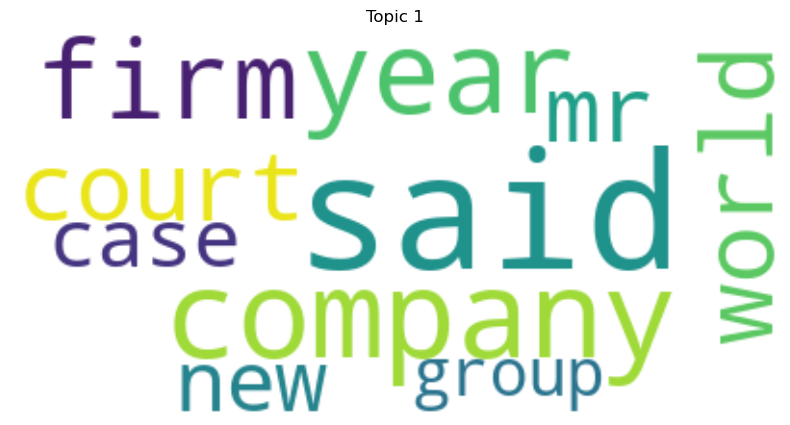

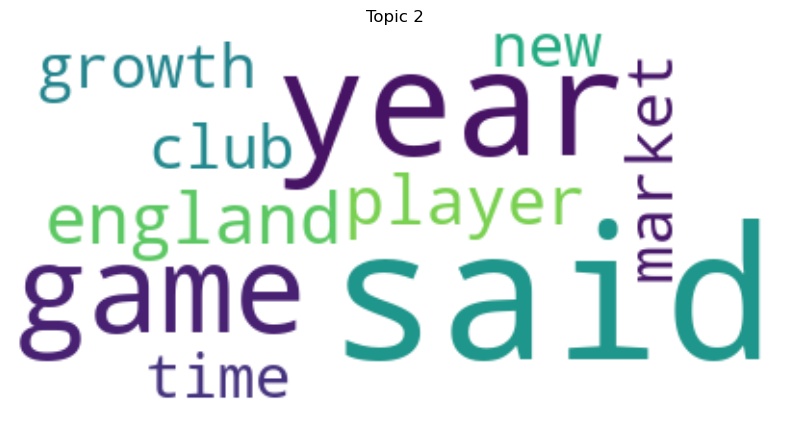

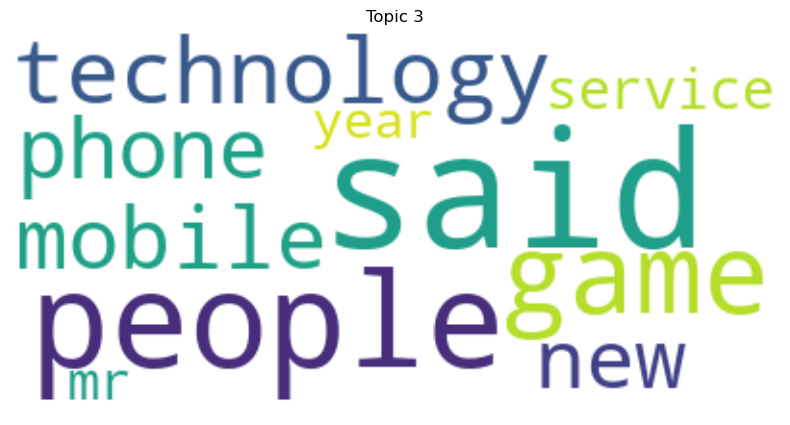

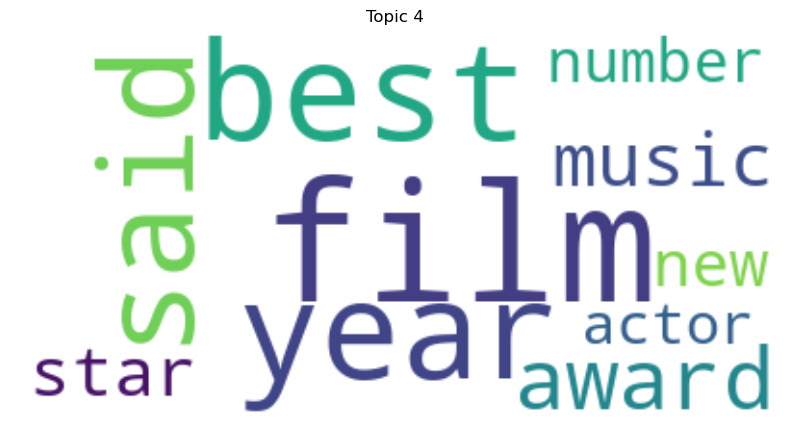

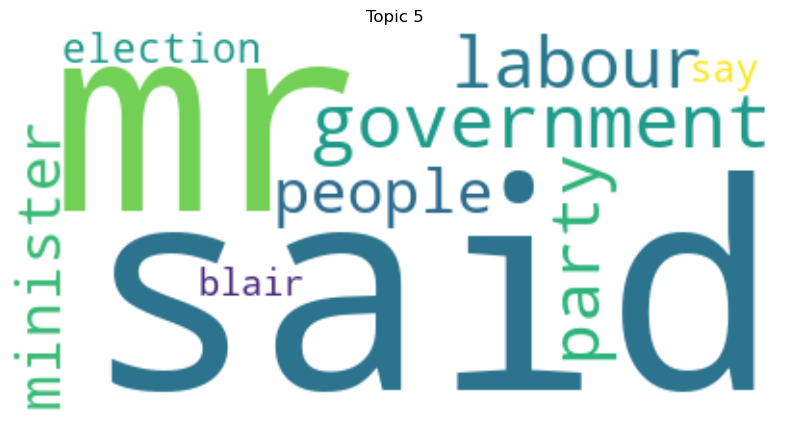

In [20]:
# Get the feature names from count vectorizer
feature_names = count_vectorizer.get_feature_names()

# Get the topics and their top 10 words for LDA
lda_topics = [[(feature_names[i], topic[i]) for i in topic.argsort()[:-11:-1]] for topic in lda.components_]

for i, topic in enumerate(lda_topics):
    wc = WordCloud(background_color="white", max_words=2000)
    wc.generate_from_frequencies(dict(topic))
    
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Topic {i+1}')
    plt.show()


In [21]:
lda_topics

[[('said', 968.1033136533387),
  ('company', 506.0826648197754),
  ('year', 436.49106502878556),
  ('firm', 372.25720364387564),
  ('world', 310.7571426656956),
  ('court', 297.2836693575236),
  ('mr', 272.9686381030259),
  ('new', 228.46185655965172),
  ('case', 212.37750741779828),
  ('group', 202.30541495303953)],
 [('said', 1469.3631932214107),
  ('year', 852.7354212108125),
  ('game', 593.1854624123617),
  ('england', 542.3407395455664),
  ('player', 489.0447657256128),
  ('market', 438.92271646456055),
  ('growth', 404.88805970590795),
  ('time', 397.66178776431224),
  ('club', 395.9029976081714),
  ('new', 392.6377324197123)],
 [('said', 1654.3033094243888),
  ('people', 1064.5749274391349),
  ('game', 733.6918790143409),
  ('technology', 663.4858586981339),
  ('mobile', 632.1854507674008),
  ('phone', 603.9184946703563),
  ('new', 582.3231466386816),
  ('service', 581.7823262250611),
  ('mr', 540.330773559961),
  ('year', 505.16299491976457)],
 [('film', 1030.86026083543),
  ('

### How do we interpret these topics? 


1. Check the most significant words: Start by looking at the words with the highest weights in each topic. These are the words that are most representative of the topic according to the model.

2. Understand the common theme: Try to find a common theme or category among these words. For instance, if the top words are "doctor", "patient", "hospital", and "medicine", then a good interpretation of the topic might be "Healthcare" or "Medicine".

3. Use your domain knowledge: Your own understanding of the subject matter can be very useful in interpreting the topics. For instance, if you're analyzing news articles and one of the topics contains words like "election", "votes", "candidate", and "campaign", then you could interpret this as a "Politics" topic.

4. Check the related documents: Another way to interpret the topics is to look at some documents that are heavily associated with each topic. By reading these documents, you might get a better understanding of what the topic represents.

5. Keep in mind that topics are probabilistic: Topic modelling algorithms like LDA are probabilistic, which means that they provide a probability distribution over all words for each topic, and a probability distribution over all topics for each document. The topics and the document-topic associations are not definitive but rather represent the algorithm's best guess based on the data and its own internal mathematics.

6. Don't overinterpret: Finally, remember that not all topics might make perfect sense, and that's okay. Topic models are statistical models that try to find structure in the data, but sometimes this structure doesn't map perfectly onto human interpretability.

Interpreting topics from topic modelling is more of an art than a science, requiring a mix of understanding the model's output, using your own domain knowledge, and making sensible judgments.






<div class="alert alert-block alert-info">
<b>Exercise 1 - LDA</b>
<p>
<li>Think of the topic names for the identified words in the word clouds. What would be the common themes?</li>

</p>
  
</div>

## Non-Negative Matrix Factorization (NMF)

The next algorithm we will look at is Non-Negative Matrix Factorization (NMF). NMF is a dimensionality reduction and clustering algorithm that assumes that all data and components are non-negative. It's a faster and simpler alternative to LDA that can yield good results when dealing with smaller datasets.


It assumes that all data and components are non-negative. The intuition behind NMF is that it decomposes (or factorizes) the document-term matrix into two other matrices: one with dimensions number-of-documents by number-of-topics, and the other with dimensions number-of-topics by number-of-terms.

The main difference between NMF and LDA is that while LDA uses a probabilistic approach (assuming documents are generated by a probabilistic process), NMF uses a linear algebra approach. This makes NMF faster and more scalable to larger datasets, and it doesn't require tuning as many hyperparameters.

In [22]:
Image(url= "../img/nmf.png")
# https://www.researchgate.net/figure/Conceptual-illustration-of-non-negative-matrix-factorization-NMF-decomposition-of-a_fig1_312157184

In [23]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

### Create the tf-idf feature matrix

### Digression (want to know more) - Tf-Idf

As we know, Machine Learning algorithms work with numerical data.

However, text data is a form of categorical data and it's usually in a format that is not directly understandable by machine learning algorithms. Therefore, we need to convert these texts into some form of numerical representations for our machine learning models to understand and learn from.

This process is called vectorization. There are multiple ways to convert text into vectors, some of which include:

- Bag of Words (BoW): In this approach, each unique word in the text is represented by one number. It's the simplest and most intuitive way to convert text to numbers. Each document is represented as a vector in a multidimensional space, where each dimension corresponds to a term in the dataset's vocabulary.

- TF-IDF (Term Frequency-Inverse Document Frequency): This is an improvement over BoW. TF-IDF also creates a document-term matrix, but it weights the counts by a measure of how unique the word is to the given document versus the entire corpus of documents. This helps to give higher weight to the more "important" words.

- Word Embeddings (Word2Vec, GloVe): These are more advanced methods that represent words in a continuous vector space where semantically similar words are mapped to nearby points.



In [24]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['processed_text'])

### Create and fit the NMF model


In [25]:
nmf = NMF(n_components=5, random_state=42)
nmf.fit(tfidf)


C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


NMF(n_components=5, random_state=42)

###  Display the topics from the model

In [26]:
for idx, topic in enumerate(nmf.components_):
    print ("Topic ", idx, " ".join(tfidf_vectorizer.get_feature_names()[i] for i in topic.argsort()[:-10 - 1:-1]))


C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Topic  0 game england player win wale match said team ireland cup
Topic  1 mr labour election blair party brown tory said tax minister
Topic  2 mobile phone people technology music service digital said user broadband
Topic  3 film award best oscar actor star festival actress nomination director
Topic  4 growth economy said rate bank price year market sale economic


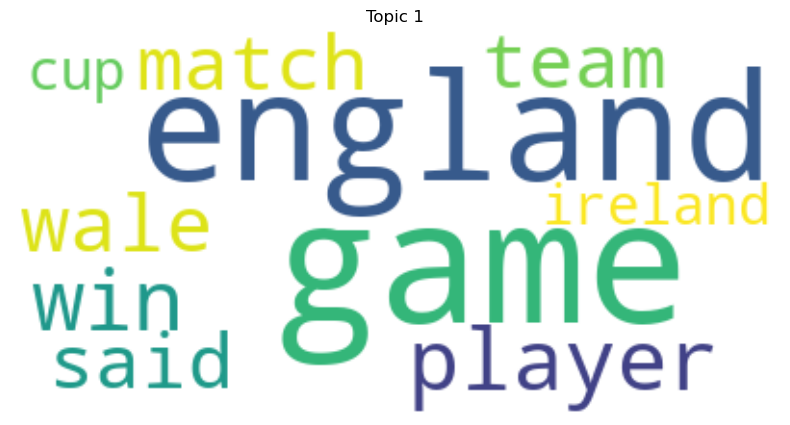

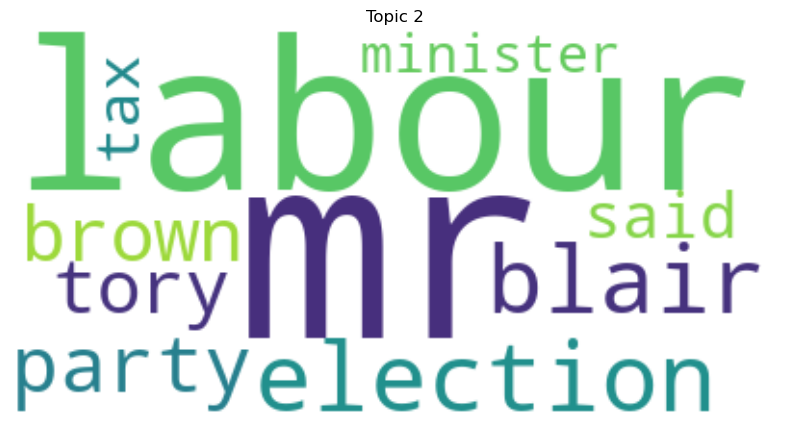

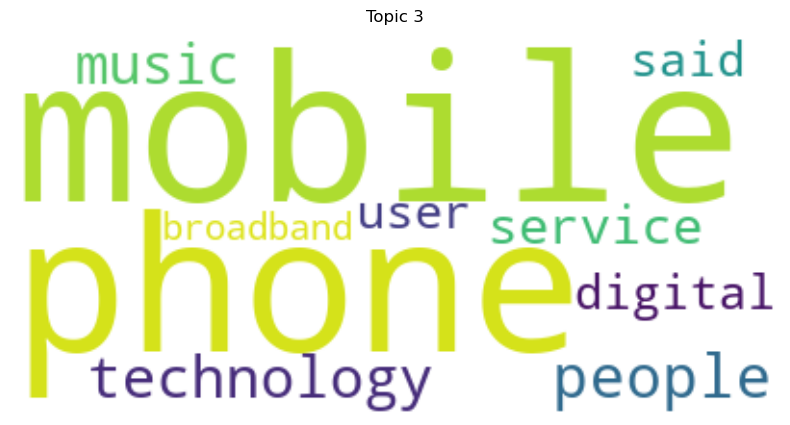

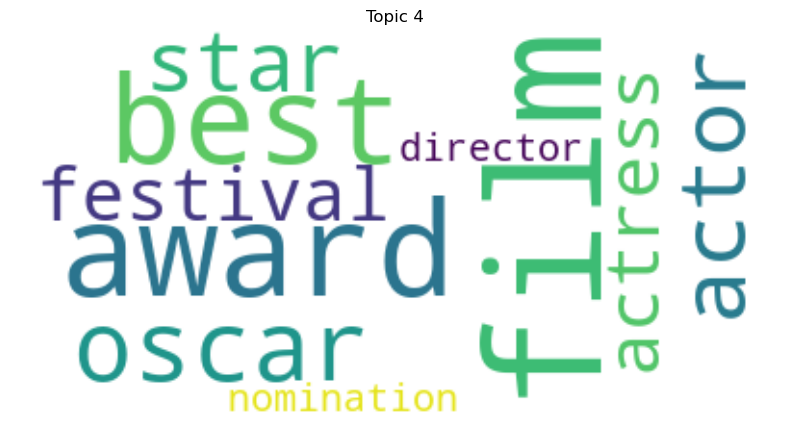

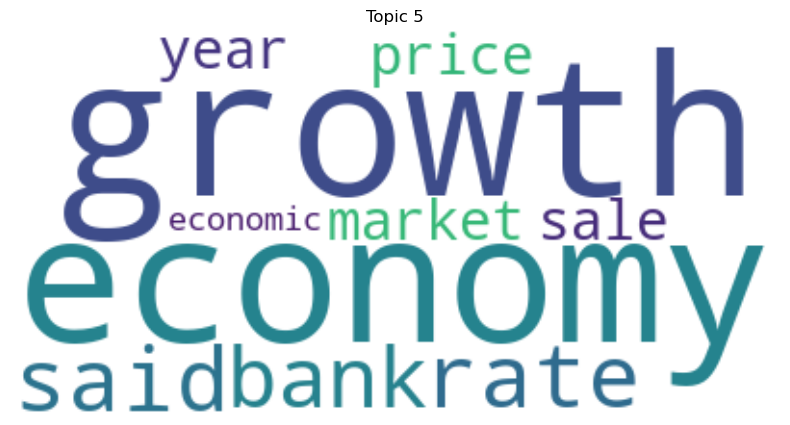

In [27]:

# Get the feature names from tfidf vectorizer
feature_names = tfidf_vectorizer.get_feature_names()

# Get the topics and their top 10 words for NMF
nmf_topics = [[(feature_names[i], topic[i]) for i in topic.argsort()[:-11:-1]] for topic in nmf.components_]

for i, topic in enumerate(nmf_topics):
    wc = WordCloud(background_color="white", max_words=2000)
    wc.generate_from_frequencies(dict(topic))
    
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Topic {i+1}')
    plt.show()

In [ ]:
nmf_topics

<div class="alert alert-block alert-info">
<b>Exercise 2 - NMF</b>
<p>
<li>Compare these word clouds to the ones generated by LDA. What are the differences?</li>

</p>
  
</div>

## Model evaluation

To compare the quality of topics generated by LDA and NMF, we can use a measure called Topic Coherence. Topic Coherence measures score a single topic by measuring the degree of semantic similarity between high scoring words in the topic. These measurements help distinguish between topics that are semantically interpretable topics and topics that are artifacts of statistical inference.

Coherence score is a widely used metric for evaluating the quality of the topics learned by a topic model. Higher coherence scores indicate that the top words in each topic are more semantically related, and therefore the topics are of better quality and more interpretable.

In [29]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

#### Create a dictionary representation of the documents.


In [30]:
dictionary = Dictionary(df['processed_text'].map(lambda x: x.split()))

We are creating a gensim dictionary object from our preprocessed text data. This dictionary is required for the calculation of coherence scores for the trained topic models. In gensim, a dictionary is a mapping between words and their integer ids. These dictionaries are used to create a 'bag-of-words' corpus in gensim, where each document is represented as a list of pairs of a word’s integer id and the word's frequency in the document.

When calculating the coherence score for a topic model, gensim's CoherenceModel uses this dictionary and the original text data (split into individual words) to measure the degree of semantic similarity between high scoring words in the topic. That's why we need this dictionary for calculating the coherence score.

#### Get the feature names from count vectorizer

get_feature_names() is a method of CountVectorizer that returns a list where each element is a string representing a feature (in this case, a word). The order of the features in the list corresponds to the column order in the output matrix of token counts.

In [31]:
feature_names = count_vectorizer.get_feature_names()

C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#### Get the topics from each model

In [32]:
lda_topics = [[feature_names[i] for i in topic.argsort()[:-10 - 1:-1]] for topic in lda.components_]
nmf_topics = [[feature_names[i] for i in topic.argsort()[:-10 - 1:-1]] for topic in nmf.components_]

- lda_topics and nmf_topics are a list of lists, where each sub-list represents a topic, and the elements of each sub-list are the top 10 words in the corresponding topic
- the word is determined by mapping the index i to feature_names[i].

#### Get coherence for each model

In [33]:
lda_coherence = CoherenceModel(topics=lda_topics, texts=df['p rocessed_text'].map(lambda x: x.split()), dictionary=dictionary, coherence='c_v').get_coherence()
nmf_coherence = CoherenceModel(topics=nmf_topics, texts=df['processed_text'].map(lambda x: x.split()), dictionary=dictionary, coherence='c_v').get_coherence()

print('LDA Coherence: ', lda_coherence)
print('NMF Coherence: ', nmf_coherence)


LDA Coherence:  0.47815634518994676
NMF Coherence:  0.7420778984163133


However, remember that interpretability of topics is subjective and dependent on the specific application or use case. Thus, while the coherence score serves as a decent measure of topic quality, you should also manually examine some of the topics and see how sensible they are. Furthermore, the best model for your application may also depend on factors like training time, which can vary significantly between these models.






In [34]:
import plotly.graph_objects as go

#### Get the feature names from count vectorizer


In [35]:
feature_names = count_vectorizer.get_feature_names()

#### Get the topics and their top 10 words for LDA


In [36]:
lda_topics = [[(feature_names[i], topic[i]) for i in topic.argsort()[:-11:-1]] for topic in lda.components_]

-  lda_topics is  a list of lists, where each sub-list represents a topic
- However, in this case, the elements of each sub-list are tuples
- Each tuple contains a word and its corresponding weight in the topic. The word is determined by mapping the index i to feature_names[i], and the weight is topic[i].



topic.argsort()[:-10 - 1:-1] gets the indices of the top 10 words in each topic (by importance), and [feature_names[i] for i in ...] uses these indices to get the corresponding words. These lists of words are the topics that the CoherenceModel expects.

In [37]:
for i, topic in enumerate(lda_topics):
    labels, values = zip(*topic)
    fig = go.Figure(data=[go.Bar(x=values, y=labels, orientation='h')])
    fig.update_layout(title_text=f'LDA Topic {i+1}')
    fig.show()

#### Get the topics and their top 10 words for NMF


In [38]:
nmf_topics = [[(feature_names[i], topic[i]) for i in topic.argsort()[:-11:-1]] for topic in nmf.components_]


In [39]:
for i, topic in enumerate(nmf_topics):
    labels, values = zip(*topic)
    fig = go.Figure(data=[go.Bar(x=values, y=labels, orientation='h')])
    fig.update_layout(title_text=f'NMF Topic {i+1}')
    fig.show()


### Literature and references

- "Latent Dirichlet Allocation" by David M. Blei, Andrew Y. Ng, Michael I. Jordan (https://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf) - This is the original paper that introduced LDA.

- Topic modeling in Python with NLTK and Gensim (https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24) - This blog post provides a practical guide to topic modeling in Python.

- Nonnegative Matrix Factorization (NMF) (https://medium.com/python-in-plain-english/topic-modelling-with-nmf-in-python-194eb6ae04a5) - Practical Guide - This post explains how to perform topic modeling using NMF with practical examples. 